In [1]:
!pip install catboost
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import BayesianRidge, Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use("seaborn-notebook")

pd.set_option("display.max_columns", None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [20]:
train_path = "/content/drive/MyDrive/Colab Notebooks/kaggle/house_price_prediction/train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/kaggle/house_price_prediction/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [21]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
months = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
          7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

In [24]:
# MSSubClass is a categorical column, not numeric
#MSSubClass: The building class

train_df["MSSubClass"] = train_df["MSSubClass"].astype(str)
test_df["MSSubClass"] = test_df["MSSubClass"].astype(str)

In [25]:
#Train 데이터셋과 Test 데이터셋 병합

test_ids = test_df["Id"]
target = train_df["SalePrice"]

df0 = pd.concat([train_df, test_df])
df0 = df0.drop(columns=["Id", "SalePrice"])

df0 = df0.reset_index(drop=True)
df0

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

In [26]:
#결측치 처리
#na_cat_cols : 결측치 존재하는 수치형 컬럼
#na_num_cols : 결측치 존재하는 수치형 컬럼

import numpy as np

na_cat_cols = df0.loc[:, df0.isna().sum() > 0].select_dtypes("object").columns
na_num_cols = df0.loc[:, df0.isna().sum() > 0].select_dtypes(np.number).columns

df1 = df0.copy()

**범주형 결측치 처리**

In [27]:
na_cat_cols

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [28]:
#범주형 컬럼의 결측치 갯수
df1.loc[:, na_cat_cols].isna().sum()

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

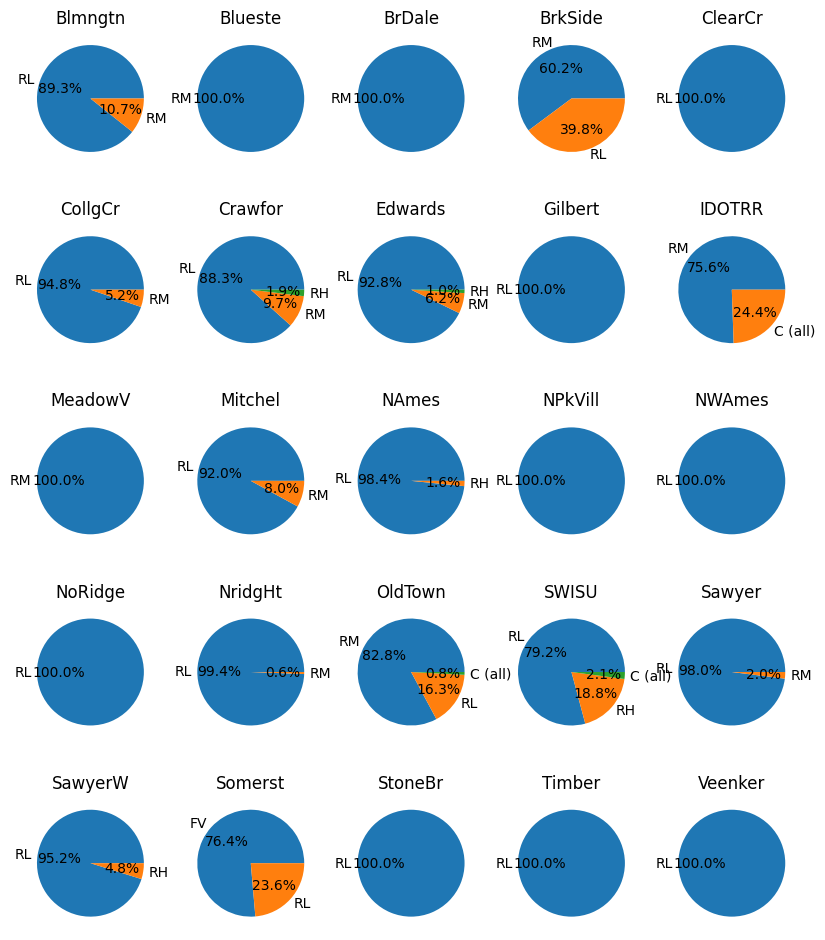

In [29]:
#calculates the value counts of "MSZoning" for the current neighborhood (kind)
#neighborhood 마다 subplot으로 파이차트를 만드는 loop

MSZoning_vals = df1.MSZoning.unique()
Neighborhood_vals = sorted(df1.Neighborhood.unique())


plt.figure(figsize=(10, 12))
plt.subplot(5, 5, 25)

for i, kind in enumerate(Neighborhood_vals):

    plt.subplot(5, 5, i + 1)

    vals = df1[df1.Neighborhood == kind]["MSZoning"].value_counts()
    plt.pie(x=vals, labels=vals.index, autopct='%1.1f%%')
    plt.title(f"{kind}")

plt.show()

In [30]:
#MSZoning 결측치를 이웃의 MSZoning 최대 비율값으로 대체

MSZoning_null_rows = df1[df1["MSZoning"].isna()].index

for row in MSZoning_null_rows:

    N_row = df1.iloc[row].Neighborhood
    MSZ_row = df1[df1["Neighborhood"] == N_row]["MSZoning"].value_counts().index[0] #value_counts 했을 때 가장 많은 값
    df1.at[row, "MSZoning"] = MSZ_row
    print("Neighborhood ", N_row, " --> ", MSZ_row, " MSZoning")

Neighborhood  IDOTRR  -->  RM  MSZoning
Neighborhood  IDOTRR  -->  RM  MSZoning
Neighborhood  IDOTRR  -->  RM  MSZoning
Neighborhood  Mitchel  -->  RL  MSZoning


In [31]:
df1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [32]:
# 결측치를 최빈값 (mode)로 대체
for col in [
    "Utilities", "Exterior1st", "Exterior2nd",
    "MasVnrType", "Electrical", "KitchenQual", "Functional",
    "SaleType"
            ]:
    df1[col] = df1[col].fillna(df1[col].mode()[0])


In [33]:
# 결측치를 '--'로 대체
# 결측치를 대체하지 않고 리터럴 처리 하는 이유는 아래 컬럼들은 null이 유의미한 값이기 때문임

for col in [
    "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual",
    "GarageCond", "PoolQC", "Fence", "MiscFeature"
            ]:

    df1[col] = df1[col].fillna("--")

**수치형 컬럼 결측치 처리**

In [34]:
df1.loc[:, na_num_cols].isna().sum()

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [35]:
#KNeighborsRegressor 사용해서 결측치 채우기


for col in [
        "LotFrontage", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
        "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"
            ]:

    knn = KNeighborsRegressor(n_neighbors=10)

    num_df = df1.select_dtypes(np.number)
    non_na_num_cols = num_df.loc[:, num_df.isna().sum() == 0].columns

    X_train = num_df.loc[num_df[col].isna() == False, non_na_num_cols] # 타겟 컬럼 col이 결측치가 아닌 행의 feature values
    y_train = num_df.loc[num_df[col].isna() == False, col] #상응하는 target values

    X_test = num_df.loc[num_df[col].isna() == True, non_na_num_cols]

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    df1.loc[num_df[col].isna() == True, col] = y_pred #df1의 col이 predicted values로 대체됨



In [37]:
#Garage 컬럼을 제외 결측치 없음
#GarageCars 컬럼은 예측에 사용되지 않음

df1.isna().sum()[df1.isna().sum() > 0]

GarageYrBlt    159
GarageCars       1
GarageArea       1
dtype: int64

**이상치 처리**



In [38]:
df2 =df1.copy()

In [40]:
#Masonry veneer(벽돌 담장?) type이 none 이면 area를 0으로 채우기
# 반대로 area가 0이면 type을 0으로 채우기

df2.loc[df2["MasVnrType"] == "None", "MasVnrArea"] = 0
df2.loc[df2["MasVnrArea"] == 0, "MasVnrType"] = "None"

In [41]:
#Basement(지하실)


cat_bsmt_cols = [col for col in df2.columns if "Bsmt" in col and df2[col].dtype == "object"]
num_bsmt_cols = [col for col in df2.columns if "Bsmt" in col and df2[col].dtype == np.number]

cat_bsmt_cols, num_bsmt_cols

(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],
 ['BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath'])

In [42]:
#BsmtQual이 '--'라는 것은 Basement가 없다는 것
#이 경우 Basement 관련 수치형 컬럼들 0으로 대체
#범주형 컬럼들은 '--'로 대체

for col in cat_bsmt_cols:
    df2.loc[df2[col] == "--", cat_bsmt_cols] = "--"

df2.loc[df2["BsmtQual"] == "--", num_bsmt_cols] = 0

In [43]:
#Garage(주차장)도 마찬가지로 이상치 처리
cat_grg_cols = [col for col in df2.columns if "Garage" in col and df2[col].dtype == "object"]
num_grg_cols = [col for col in df2.columns if "Garage" in col and df2[col].dtype == np.number and "Yr" not in col]

cat_grg_cols, num_grg_cols

(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
 ['GarageCars', 'GarageArea'])

In [44]:
for col in cat_grg_cols:
    df2.loc[df2[col] == "--" , cat_grg_cols] = "--"

for col in num_grg_cols:
    df2.loc[df2[col] == 0 , num_grg_cols] = 0

df2.loc[df2["GarageType"] == "--", num_grg_cols] = 0

df2.loc[df2["GarageArea"] == 0, cat_grg_cols] = "--"

**피처 엔지니어링(Feature Enginerring)**
머신러닝의 성능을 높일 수 있도록 피처들을 추가 및 수정한다

In [45]:
df3 = df2.copy()


In [47]:
#연식을 나타내는 컬럼 추출
year_cols = [col for col in df3.columns if "Year" in col or "Yr" in col]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [48]:
#garageAgeRank, houseAgeRank, houseRemodRank 컬럼 추가
#year_cols 제외

garage_age = df3["YrSold"] - df3["GarageYrBlt"]
df3["garageAgeRank"] = np.max(garage_age) - garage_age + 1
df3["garageAgeRank"] = df3["garageAgeRank"].fillna(0)

house_age = df3["YrSold"] - df3["YearBuilt"]
df3["houseAgeRank"] = np.max(house_age) - house_age + 1

house_remod = df3["YrSold"] - df3["YearRemodAdd"]
df3["houseRemodRank"] = np.max(house_remod) - house_remod + 1

df3 = df3.drop(columns=year_cols)

In [57]:
#수치형 컬럼 데이터 왜도(skewed) 확인

df4 = df3.copy()

num_cols = df4.select_dtypes(np.number).columns

skew_df = pd.DataFrame(df4.select_dtypes(np.number).columns, columns=["Feature"])
skew_df["Skew"] = skew_df["Feature"].apply(lambda feature: stats.skew(df4[feature]))
skew_df["Abs skew"] = skew_df["Skew"].apply(abs)
skew_df["Skewed"] = skew_df["Abs skew"].apply(lambda x: True if x > .5 else False)
skew_df

,Feature,Skew,Abs skew,Skewed
0,LotFrontage,1.330449,1.330449,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,MasVnrArea,2.624724,2.624724,True
5,BsmtFinSF1,1.431881,1.431881,True
6,BsmtFinSF2,4.164826,4.164826,True
7,BsmtUnfSF,0.919387,0.919387,True
8,TotalBsmtSF,1.093256,1.093256,True
9,1stFlrSF,1.469604,1.469604,True


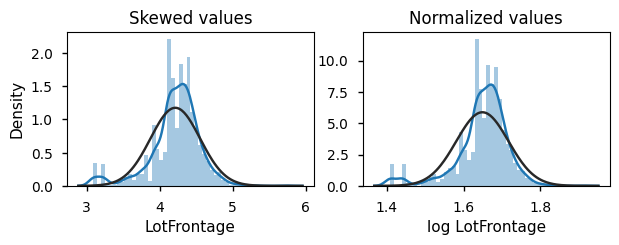

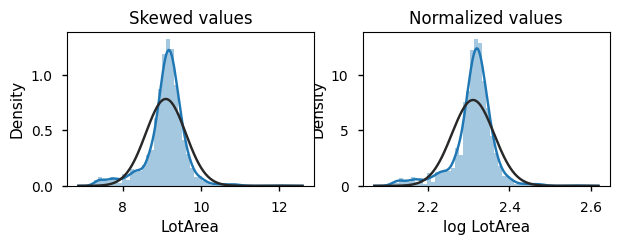

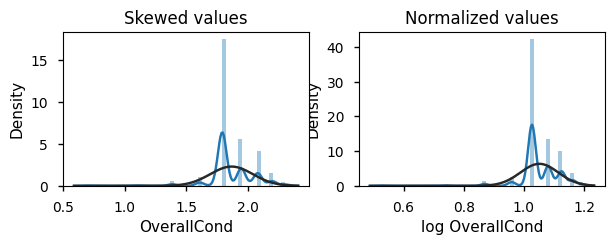

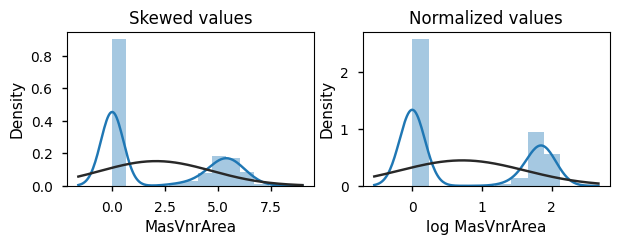

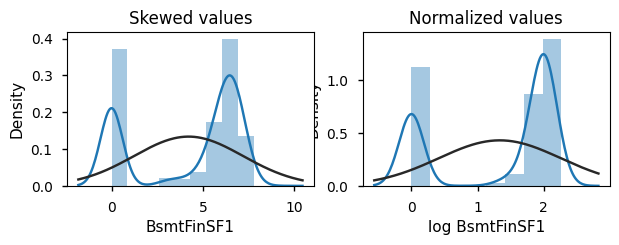

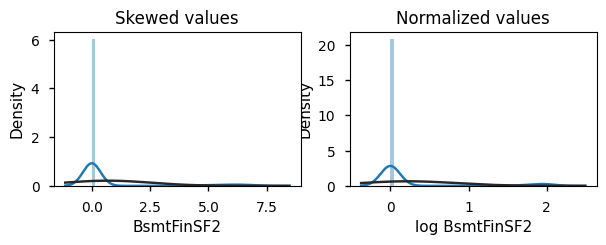

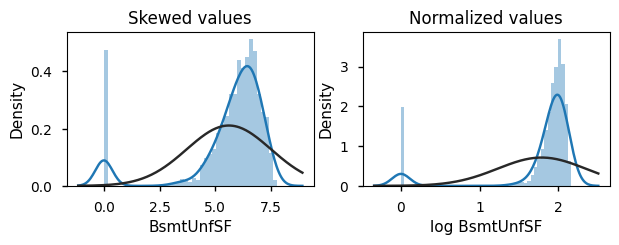

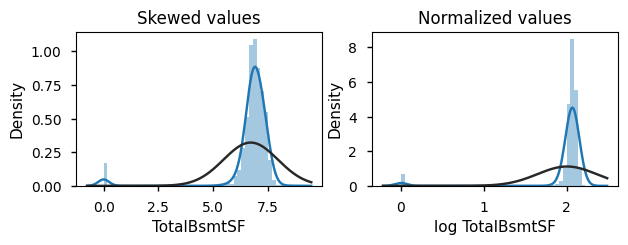

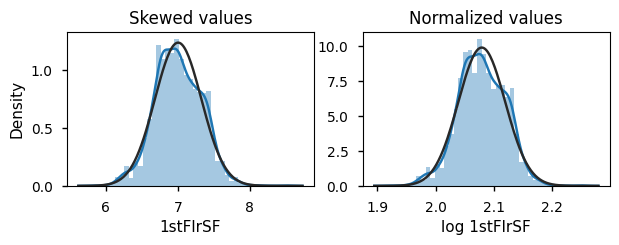

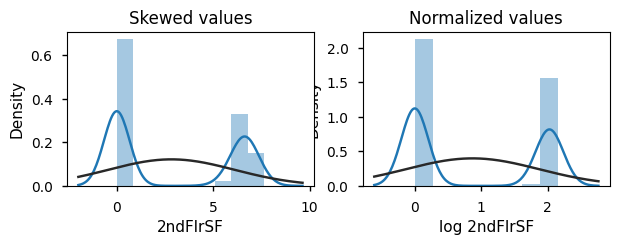

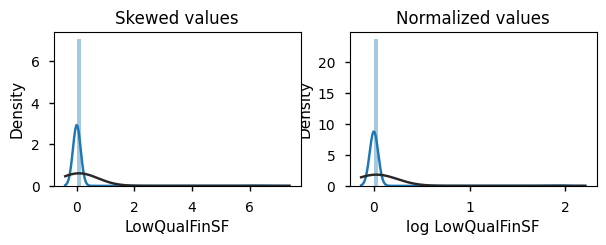

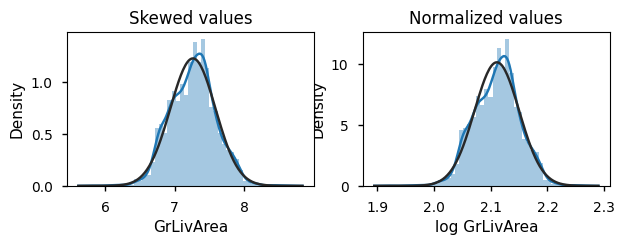

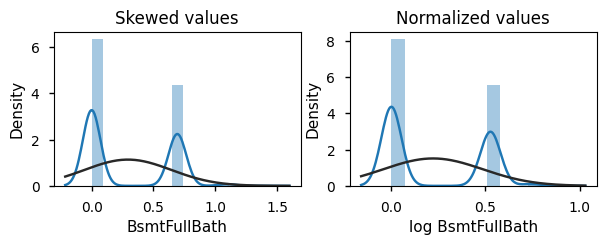

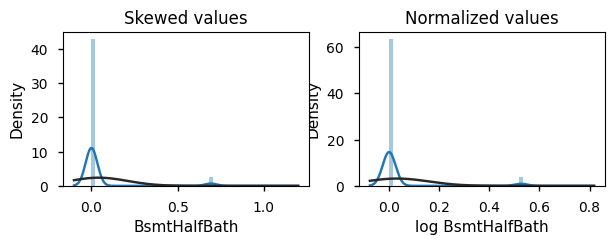

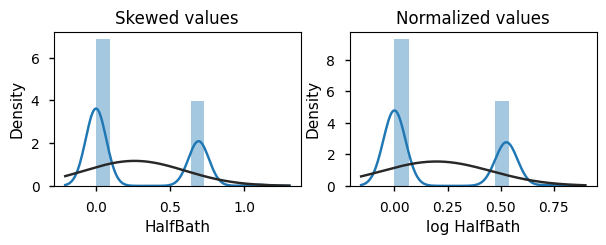

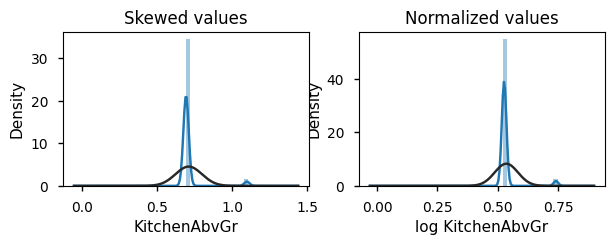

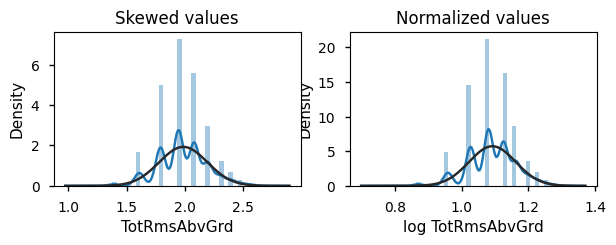

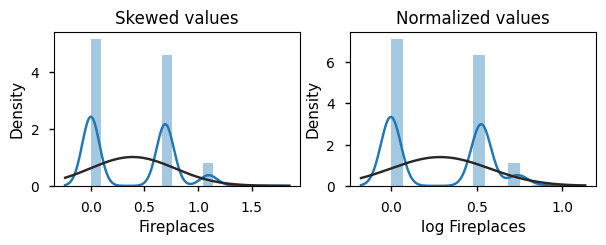

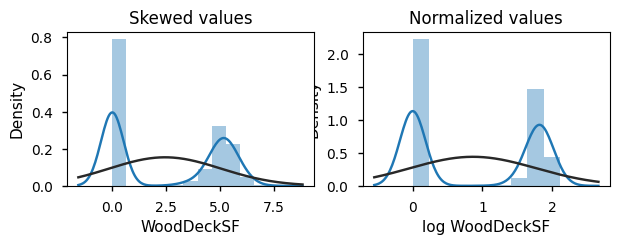

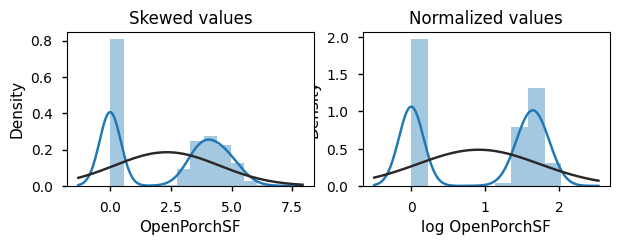

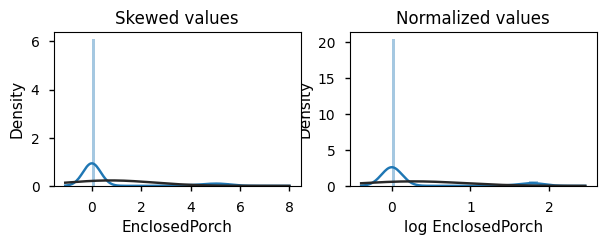

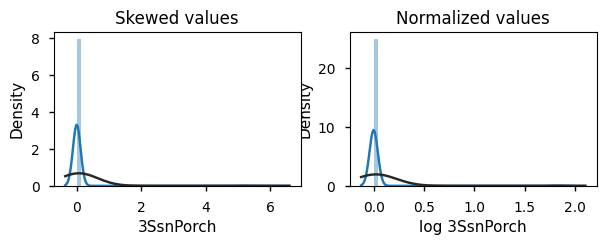

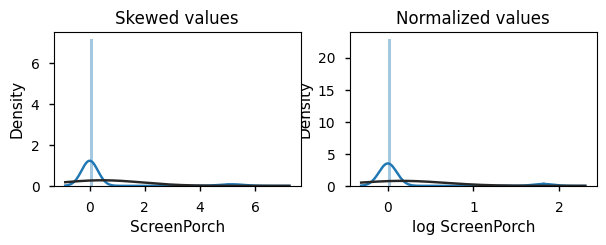

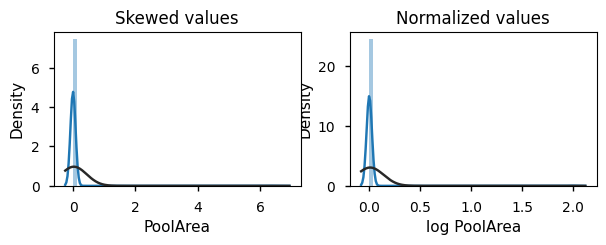

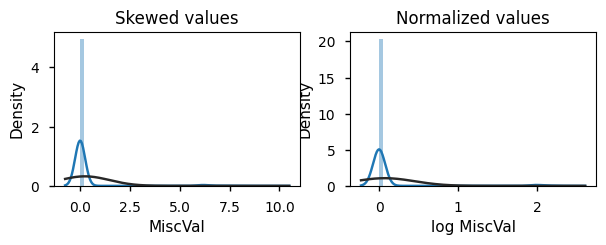

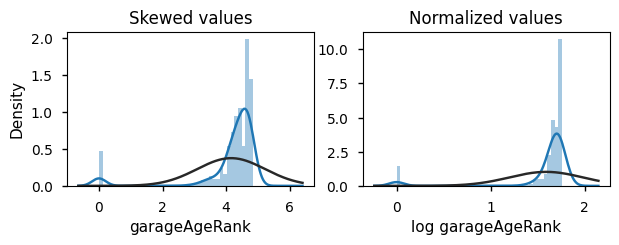

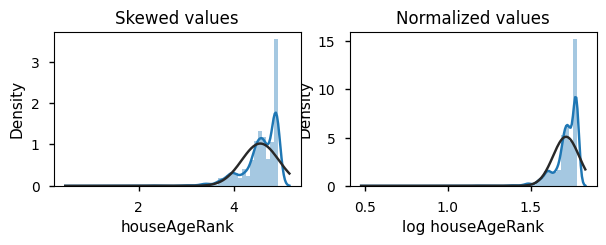

In [59]:
#비대칭(skewed) 데이터 로그 변환
#잘 변환 됐는지 시각화해서 확인
for col in skew_df.query("Skewed == True")["Feature"].values:

    plt.figure(figsize=(7, 2))
    plt.subplot(1, 2, 2)
    plt.subplot(1, 2, 1)
    sns.distplot(df4[col], kde=True, fit=stats.norm)
    plt.title("Skewed values")

    transformed_values = np.log1p(df4[col])
    plt.subplot(1, 2, 2)
    sns.distplot(transformed_values, kde=True, fit=stats.norm)
    plt.title("Normalized values")
    plt.xlabel(f"log {col}")

    plt.show()
    df4[col] = transformed_values

In [61]:
#범주형 컬럼 인코딩

df5 = df4.copy()

cat_cols = df5.select_dtypes("object").columns


In [63]:
#함수로 뭐하는건지 잘 이해안됨
def CMMPlot(data, col, target):

    df = data.copy()
    count = df.groupby(col, dropna=False, as_index=False)[target].count()
    count[col] = count[col].fillna("--")
    count = count.sort_values(by=target)

    means = df.groupby(col, dropna=False)[target].mean().sort_values()
    means.index = means.index.fillna("--")

    medians = df.groupby(col, dropna=False)[target].median().sort_values()
    medians.index = medians.index.fillna("--")

    means = means.reindex(medians.index)
    return medians, means

for col in cat_cols:

    medians, _ = CMMPlot(pd.concat([df5, target], axis=1), col, "SalePrice")

    encode_map = {col: {key: i for i, key in enumerate(medians.index)}}
    df5[col] = df5[col].map(encode_map[col])

In [67]:
#데이터 스케일링
scaler = StandardScaler()
df6 = pd.DataFrame(scaler.fit_transform(df5), index=df5.index, columns=df5.columns)

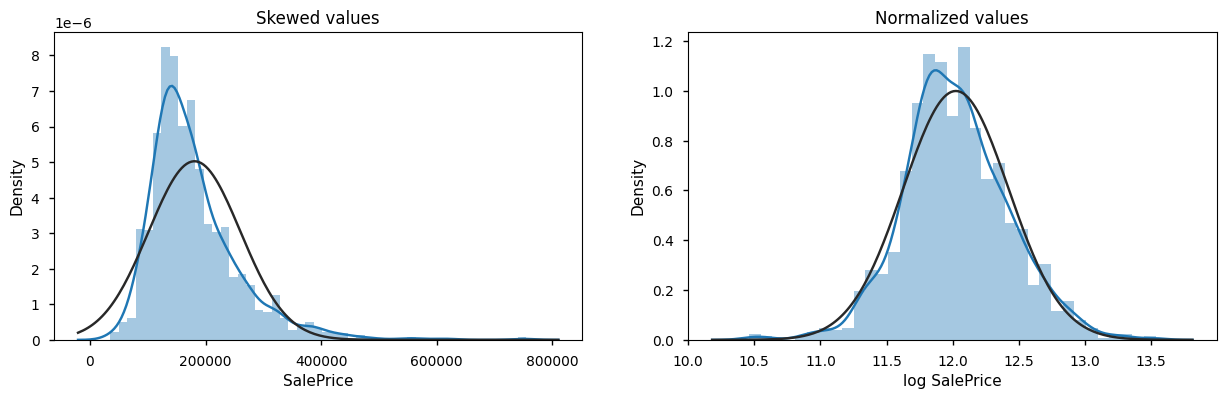

In [65]:
# target 데이터 로그 변환
# target=df_train["SalePrice"]

transformed_target = np.log(target)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 2)

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=stats.norm)
plt.title("Skewed values")

plt.subplot(1, 2, 2)
sns.distplot(transformed_target, kde=True, fit=stats.norm)
plt.title("Normalized values")
plt.xlabel("log SalePrice")

plt.show()

**Train / Test 데이터 분리**

In [89]:
X_train = df6.loc[:len(train_df)-1]
X_test = df6.loc[len(train_df):]

**Lasso / Ridge / CatBoost 모델에 train**

In [90]:
from sklearn.linear_model import Lasso

models = {
    "catboost": CatBoostRegressor(verbose=0),
    "lasso": Lasso(),
    "ridge": Ridge()
}

In [91]:
for name, model in models.items():
    model.fit(X_train, transformed_target)
    print(name, " trained")

catboost  trained
lasso  trained
ridge  trained


#**모델 평가**
MSE 값을 바탕으로 각 모델의 성능 평가

In [93]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    res = np.exp(np.sqrt(-cross_val_score(model, X_train, transformed_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = np.mean(res)

In [94]:
for name, res in results.items():
    print(name, "MSE:", res)

catboost MSE: 1.1271751465006317
lasso MSE: 1.4903539173425995
ridge MSE: 1.1396448737194473


Catboost가 가장 좋은 성능을 보임

In [95]:
preds = {}

for name, model in models.items():
    preds.update({name: np.exp(model.predict(X_test))})

In [96]:
#catboost 모델 활용하여 예측
y_pred = (preds["catboost"])

In [97]:
output = pd.DataFrame({'Id': test_ids,
                       'SalePrice': y_pred.squeeze()})

output

,Id,SalePrice
0,1461,125136.412962
1,1462,164679.734660
2,1463,185062.261296
3,1464,197186.229762
4,1465,185404.268281
...,...,...
1454,2915,82909.854277
1455,2916,83604.760301
1456,2917,158510.522957
1457,2918,110977.941526
